# 서울시 상권매출 데이터 분석 
서울시 공공데이터 상권매출 데이터로 보는, 발달상권과 골목상권의 매출을 비교하여 차이를 알아봅니다. 


# 0. 환경 셋팅

In [38]:
############################################

# OS환경 : Mac OS

############################################ 초기셋팅
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import platform
import matplotlib

import warnings
warnings.filterwarnings('ignore')

###################### 여기서 Matplotlib 코드를 사용하여 그래프 생성 및 표시
%matplotlib inline

In [39]:
######################## 시각화 셋팅 
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
## 폰트 설정 및 마이너스 부호 설정
plt.rc('font', family='NanumSquare') #나눔 글꼴로 설정
#plt.rc('font', family='Malgun Gothic') #맑은 고딕으로 설정
plt.rc('font', family='AppleGothic') #맥
plt.rcParams['axes.unicode_minus'] = False #부호

In [40]:
######################## 불러오기 
### 서울시 상권분석서비스(상권-추정매출).csv
### 서울시 상권분석서비스상권영역_seoul_v3.xlsx 
### 두 파일을 '상권 코드'를 기준으로 합치고 1차 정제 

df= pd.read_csv('./data/df_c.csv',encoding='utf-8') 
df.shape 

(129808, 83)

In [41]:
############################### 결측치 갯수 확인
df.isna().sum().sum()         # 0
df.columns
# # ############################### 중복값 갯수 확인
df[df.duplicated(keep=False)].sum().sum()    # 0.0 없음

############################### 데이터값이 "*" --> 1로 수정 (점포수 2~3개 미만은 *으로 표시된다고함)
star_count = df[df == '*' ].count()
star_count                      # '점포수'컬럼에 * 로 되어있는 데이터갯수 51451개
star_count.sum()                # 51451개
# '*' 문자열을 1로 대체
df['점포수'] = df['점포수'].replace('*', '1')
# 문자열을 숫자로 변환 (부동 소수점 숫자로 변환하는 경우)
df['점포수'] = df['점포수'].astype(float)
star_count.sum()                # 0 개

############################### 행정동,자치구 컬럼에 있는 "띄어쓰기" 없애기
df['행정동'] = df['행정동'].str.replace(' ', '')
df['자치구'] = df['자치구'].str.replace(' ', '')

############################### 2023년 1분기 ----> 그냥 5분기로 변경
df.loc[(df['기준_년_코드'] == 2023) & (df['기준_분기_코드'] == 1), '기준_분기_코드'] = 5
df['기준_분기_코드'].unique()     # array([5, 4, 3, 2, 1])
df.sort_values(by='기준_분기_코드', inplace=True)
df['기준_분기_코드'].unique()     # array([1, 2, 3, 4, 5])    분기별 오름차순 정렬 ok

############################### 불필요 컬럼 삭제 
df = df.drop(['기준_년_코드','카테고리'], axis=1)

############################################ 카테고리 컬럼 불필요로 삭제 
df.shape                     # (129808, 81)

(129808, 81)

# 1. 상권 파악

In [42]:
df.columns

Index(['자치구', '행정동', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건

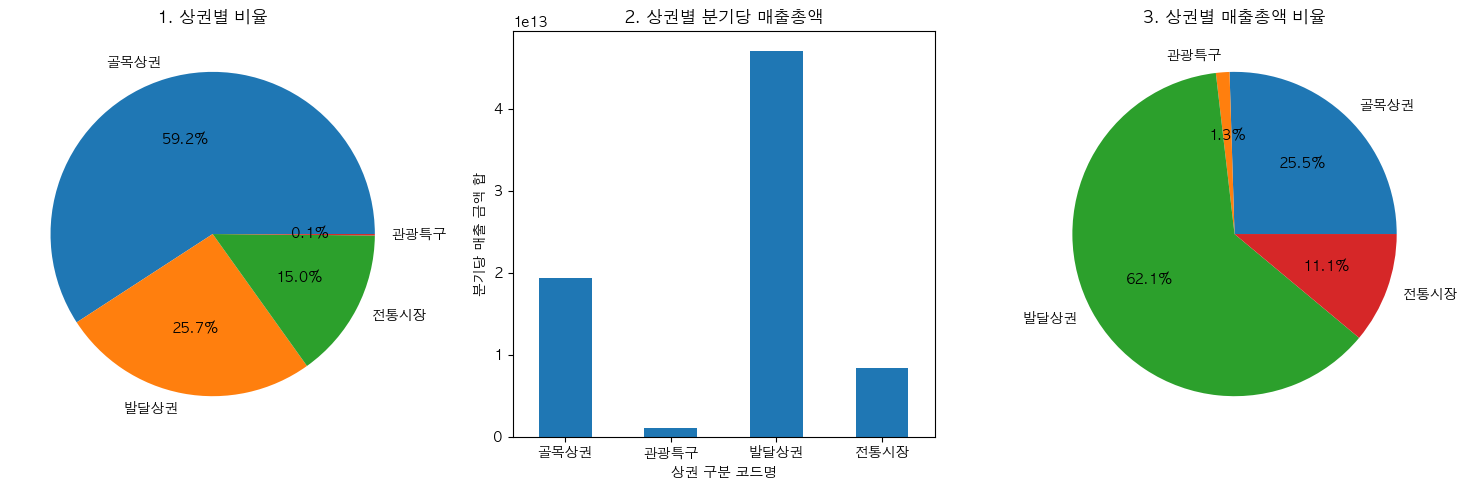

In [43]:
################################################ 상권별 파악 3가지 시각화 
plt.figure(figsize=(15, 5))

################################################ 1. 각 데이터값들의 비율
value_counts = df['상권_구분_코드_명'].value_counts()

plt.subplot(1,3,1)
plt.pie(value_counts, labels=value_counts.index, autopct='%.1f%%')
plt.title('1. 상권별 비율')
################################################ 2. 각 "분기당_매출_금액" 총액 비교  
markets = df.groupby('상권_구분_코드_명')['분기당_매출_금액'].sum()

plt.subplot(1,3,2)
markets.plot(kind='bar')
plt.title('2. 상권별 분기당 매출총액')
plt.xlabel('상권 구분 코드명')
plt.ylabel('분기당 매출 금액 합')
plt.xticks(rotation=0)  # x축 레이블을 0도 회전
################################################ 3. 각 "분기당_매출_금액" 총액 비율 
# 각 상권별 ( "분기당_매출_금액".sum )에 대한 백분율 비율  
# 퍼센트 = ("분기당_매출_금액".sum) / ("분기당_매출_금액".sum) * 100 
per_markets = markets / markets.sum() * 100 

plt.subplot(1,3,3)
plt.pie(per_markets, labels=per_markets.index, autopct='%.1f%%')
plt.title('3. 상권별 매출총액 비율')
################################################ 세 가지 그래프 
plt.tight_layout()
plt.show()

# 2. 컬럼 정리

필요/불필요한 데이터를 구분하고 정제한다. 

In [44]:
############################################ 골목상권과 발달상권만 발췌 
df_g = df[df['상권_구분_코드_명']=='골목상권']
df_b = df[df['상권_구분_코드_명']=='발달상권']
############################################ 필요컬럼만 발췌
basic_columns = [
    '기준_분기_코드', '자치구', '행정동', '상권_코드_명','서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수','점포수',
    
    '월요일_매출_금액','화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액','일요일_매출_금액', 
    '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수','금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수', 

    '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액','시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', 
    '시간대_건수~06_매출_건수','시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수','시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', 

    '남성_매출_금액','여성_매출_금액',
    '남성_매출_건수', '여성_매출_건수',

    '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액','연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액',
    '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수','연령대_50_매출_건수', '연령대_60_이상_매출_건수',
]
df_g = df_g[basic_columns]
df_b = df_b[basic_columns]

############################################ 필요컬럼 중에서 -> 이름 짧게
column_name_mapping  = {
    '기준_분기_코드' : '분기', 
    '상권_코드_명' : '상권',
    '서비스_업종_코드_명':'업종명', 
    '분기당_매출_금액' : '금액',
    '분기당_매출_건수' : '건수',
    '점포수' : '점포',
    '월요일_매출_금액' : '금액(월)',
    '화요일_매출_금액' : '금액(화)',
    '수요일_매출_금액' : '금액(수)',
    '목요일_매출_금액' : '금액(목)',
    '금요일_매출_금액' : '금액(금)',
    '토요일_매출_금액' : '금액(토)',
    '일요일_매출_금액' : '금액(일)',
    '월요일_매출_건수' : '건수(월)',
    '화요일_매출_건수' : '건수(화)',
    '수요일_매출_건수' : '건수(수)',
    '목요일_매출_건수' : '건수(목)',
    '금요일_매출_건수' : '건수(금)', 
    '토요일_매출_건수' : '건수(토)',
    '일요일_매출_건수' : '건수(일)', 
    '시간대_00~06_매출_금액' : '금액(새벽)',
    '시간대_06~11_매출_금액' : '금액(아침)',
    '시간대_11~14_매출_금액' : '금액(점심)',
    '시간대_14~17_매출_금액' : '금액(오후)',
    '시간대_17~21_매출_금액' : '금액(저녁)',
    '시간대_21~24_매출_금액' : '금액(심야)',
    '시간대_건수~06_매출_건수': '건수(새벽)',
    '시간대_건수~11_매출_건수': '건수(아침)',
    '시간대_건수~14_매출_건수': '건수(점심)',
    '시간대_건수~17_매출_건수': '건수(오후)',
    '시간대_건수~21_매출_건수': '건수(저녁)',
    '시간대_건수~24_매출_건수': '건수(심야)',
    '남성_매출_금액' : '금액(남)',
    '여성_매출_금액' : '금액(녀)',
    '남성_매출_건수' : '건수(남)',
    '여성_매출_건수' : '건수(녀)', 
    '연령대_10_매출_금액' : '금액(10)',
    '연령대_20_매출_금액' : '금액(20)',
    '연령대_30_매출_금액' : '금액(30)',
    '연령대_40_매출_금액' : '금액(40)', 
    '연령대_50_매출_금액' : '금액(50)',
    '연령대_60_이상_매출_금액': '금액(60)', 
    '연령대_10_매출_건수' : '건수(10)',
    '연령대_20_매출_건수' : '건수(20)', 
    '연령대_30_매출_건수' : '건수(30)', 
    '연령대_40_매출_건수' : '건수(40)', 
    '연령대_50_매출_건수' : '건수(50)', 
    '연령대_60_이상_매출_건수' : '건수(60)'
    
}
df_g.rename(columns=column_name_mapping, inplace=True)    # 골목상권 
df_b.rename(columns=column_name_mapping, inplace=True)    # 발달상권 

In [45]:
df_g.shape             # (76805, 50)
df_g.head(2)           # 골목상권 

,분기,자치구,행정동,상권,업종명,금액,건수,점포,금액(월),금액(화),...,금액(30),금액(40),금액(50),금액(60),건수(10),건수(20),건수(30),건수(40),건수(50),건수(60)
17809,1,강동구,천호3동,강동구립 천호도서관,인테리어,18000000.0,22,5.0,0.0,0.0,...,0.0,0.0,0.0,18000000.0,0,0,0,0,0,22
17808,1,강동구,천호3동,강동구립 천호도서관,애완동물,70795.0,13,3.0,0.0,0.0,...,0.0,0.0,0.0,70795.0,0,0,0,0,0,13


In [46]:
df_b.shape             # (33371, 50)
df_b.head(2)           # 발달상권

,분기,자치구,행정동,상권,업종명,금액,건수,점포,금액(월),금액(화),...,금액(30),금액(40),금액(50),금액(60),건수(10),건수(20),건수(30),건수(40),건수(50),건수(60)
24487,1,강남구,삼성2동,포스코사거리,호프-간이주점,1.024859e+09,17701,23.0,164124638.0,167358399.0,...,208677833.0,209701964.0,97458892.0,46117635.0,161,2845,4352,2796,1874,1279
24486,1,강남구,삼성2동,포스코사거리,분식전문점,2.804510e+09,189044,64.0,507113943.0,486965688.0,...,803161844.0,515263539.0,228707804.0,79938777.0,266,33567,60483,37305,20217,8020


In [47]:
############################################ 업종 분류 
df_g['업종명'].nunique()             # 43개 
df_g['업종명'].unique()
df_b['업종명'].nunique()             # 43개 
df_b['업종명'].unique()

array(['호프-간이주점', '분식전문점', '치킨전문점', '커피-음료', '한식음식점', '일식음식점', '양식음식점',
       '제과점', '패스트푸드점', '세탁소', '중식음식점', '노래방', '여관', 'PC방', '외국어학원',
       '예술학원', '스포츠 강습', '고시원', '일반의원', '한의원', '당구장', '골프연습장', '스포츠클럽',
       '자동차수리', '미용실', '네일숍', '피부관리실', '치과의원', '가전제품수리', '슈퍼마켓', '자동차미용',
       '편의점', '철물점', '가전제품', '화초', '일반의류', '핸드폰', '일반교습학원', '인테리어',
       '반찬가게', '가방', '애완동물', '완구'], dtype=object)

In [48]:
############################################ 업종 분류 
def service_category(row):
    if row['업종명'] in ['가전제품','가전제품수리','인테리어','철물점','핸드폰']:
        return '가전/인테리어'
    elif row['업종명'] in ['가방', '일반의류']:
        return '의류/잡화'
    elif row['업종명'] in ['피부관리실', '네일숍','미용실']:
        return '뷰티/미용'
    elif row['업종명'] in ['스포츠클럽','스포츠 강습','골프연습장']:
        return '운동/스포츠'
    elif row['업종명'] in ['당구장','PC방','노래방']:
        return '유흥/오락'
    elif row['업종명'] in ['치과의원', '일반의원','한의원']:
        return '의료/병원'
    elif row['업종명'] in ['양식음식점', '일식음식점', '중식음식점', '한식음식점','분식전문점']:
        return '음식/식사'
    elif row['업종명'] in ['치킨전문점', '호프-간이주점']:
        return '음식/주류'
    elif row['업종명'] in ['패스트푸드점','슈퍼마켓','반찬가게']:
        return '음식/생활'
    elif row['업종명'] in ['커피-음료', '제과점']:
        return '카페/음료'
    elif row['업종명'] in ['편의점','세탁소']:
        return '생활/식품'
    elif row['업종명'] in ['외국어학원','일반교습학원','예술학원']:
        return '교육/학원'
    elif row['업종명'] in ['여관','고시원']:
        return '숙박시설'
    elif row['업종명'] in ['화초','애완동물','완구']:
        return '취미/애완'
    elif row['업종명'] in ['자동차미용','자동차수리']:
        return '자동차'
    else:
        return '기타'

df_g['업종'] = df_g.apply(service_category, axis=1)
df_b['업종'] = df_b.apply(service_category, axis=1)

In [49]:
############################################ 업종 컬럼 정리 
df_g = df_g.drop('업종명', axis=1)
df_b = df_b.drop('업종명', axis=1)

df_g['업종'].nunique()                       # 15개
df_g['업종'].unique()
df_b['업종'].nunique()                       # 15개


15

In [50]:
df.shape        # (129808, 81)  원본 
df_g.shape      # (76805, 50)   정리완료

(76805, 50)

In [51]:
############################################ '원본'데이터와 '골목상권'데이터의 자치구 갯수 비교 
df['자치구'].nunique()        # 25개
df_g['자치구'].nunique()      # 25개 
df_b['자치구'].nunique()      # 25개 
############################################ 다행히 삭제되거나 제외된 자치구는 없다. 

25

# 컬럼 정리 완료
'골목상권'과 '발달상권'에 한정된 데이터 셋으로 정리 완료 <br><br>
**[공통]** 자치구, 행정구, 상권, 매출액, 매출건, 점포수  
**[조건]** 분기별, 업종별, 요일별, 시간대별, 성별, 연령대별 

# 3. 분기별 매출 금액 & 건수

In [52]:
df_g.head()

,분기,자치구,행정동,상권,금액,건수,점포,금액(월),금액(화),금액(수),...,금액(40),금액(50),금액(60),건수(10),건수(20),건수(30),건수(40),건수(50),건수(60),업종
17809,1,강동구,천호3동,강동구립 천호도서관,18000000.0,22,5.0,0.0,0.0,0.0,...,0.0,0.0,18000000.0,0,0,0,0,0,22,가전/인테리어
17808,1,강동구,천호3동,강동구립 천호도서관,70795.0,13,3.0,0.0,0.0,0.0,...,0.0,0.0,70795.0,0,0,0,0,0,13,취미/애완
17807,1,노원구,상계5동,상계5동주민센터,71850310.0,228,3.0,44342884.0,2853467.0,14838031.0,...,10044205.0,16550111.0,0.0,0,38,95,57,38,0,운동/스포츠
17806,1,노원구,상계5동,상계5동주민센터,244022463.0,571,6.0,116293442.0,53228522.0,11248367.0,...,144717857.0,55497389.0,3904924.0,0,0,0,334,158,8,교육/학원
17805,1,노원구,상계2동,상계2동주민센터,16445421.0,56,1.0,1291525.0,3788474.0,4993897.0,...,16445421.0,0.0,0.0,0,0,0,56,0,0,교육/학원


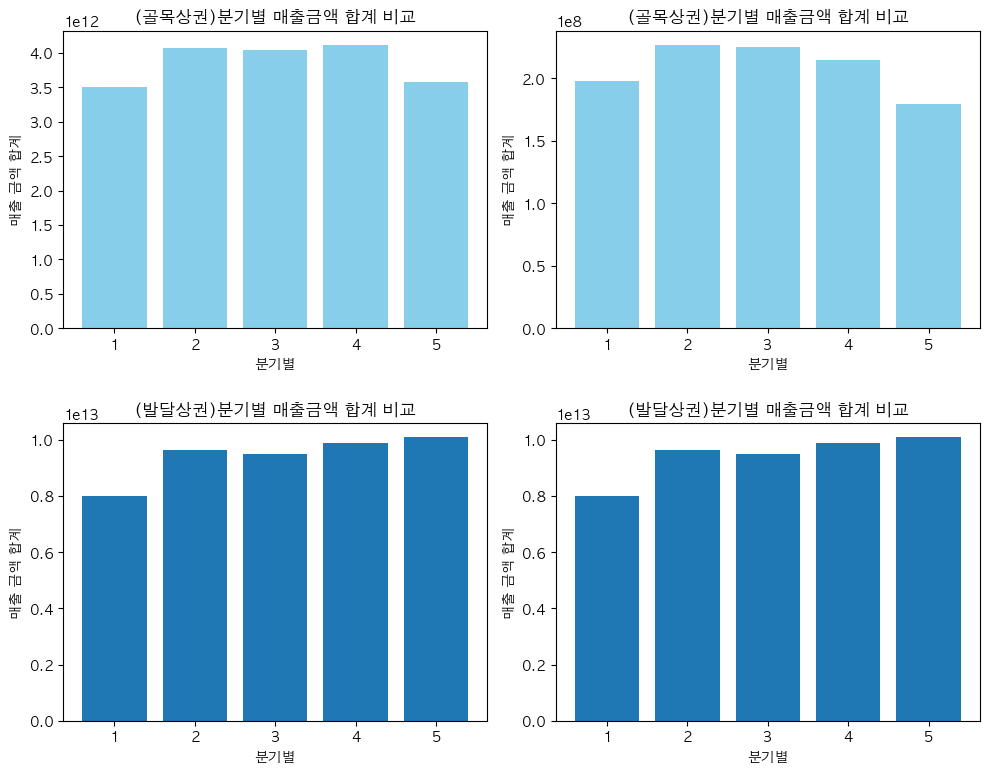

In [53]:
############################################ 분기별 금액과 건수 그래프 
plt.figure(figsize=(10,8))
############################################ 1. 분기별 매출'금액'의 합계 비교            골목  금액 
five_money_sum = df_g.groupby('분기')['금액'].sum()

plt.subplot(2,2,1)
plt.bar(five_money_sum.index, five_money_sum.values, color='skyblue')
plt.xlabel('분기별')
plt.ylabel('매출 금액 합계')
plt.title('(골목상권)분기별 매출금액 합계 비교')
############################################ 2. 분기별 매출'건수'의 합계 비교            골목   건수 
five_gun_sum = df_g.groupby('분기')['건수'].sum()

plt.subplot(2,2,2)
plt.bar(five_gun_sum.index, five_gun_sum.values, color='skyblue')
plt.xlabel('분기별')
plt.ylabel('매출 금액 합계')
plt.title('(골목상권)분기별 매출금액 합계 비교')
############################################ 3. 분기별 매출'금액'의 합계 비교            발달   금액 
b_five_money_sum = df_b.groupby('분기')['금액'].sum() 

plt.subplot(2,2,3)
plt.bar(b_five_money_sum.index, b_five_money_sum.values)
plt.xlabel('분기별')
plt.ylabel('매출 금액 합계')
plt.title('(발달상권)분기별 매출금액 합계 비교')
############################################ 4. 분기별 매출'건수'의 합계 비교            발달  건수 
b_five_gun_sum = df_b.groupby('분기')['건수'].sum()

plt.subplot(2,2,4)
plt.bar(b_five_money_sum.index, b_five_money_sum.values)
plt.xlabel('분기별')
plt.ylabel('매출 금액 합계')
plt.title('(발달상권)분기별 매출금액 합계 비교')
############################################ 시각화
plt.tight_layout()
plt.show()

골목상권은 분기마다 금액과 건수 차이가 있어, 계절에 영향을 받을수 있을 것 같다. <br>
발달상권은 분기별로 금액과 건수가 상승하고 있어, 계절에 상관없이 전반적으로 상승하고 있는것 같다. 

In [54]:
############################################ '원본'데이터와 '골목상권'데이터의 자치구 갯수 비교 
df['자치구'].nunique()        # 25개
df_g['자치구'].nunique()      # 25개 
df_b['자치구'].nunique()      # 25개 
############################################ 다행히 삭제되거나 제외된 자치구는 없다. 

25

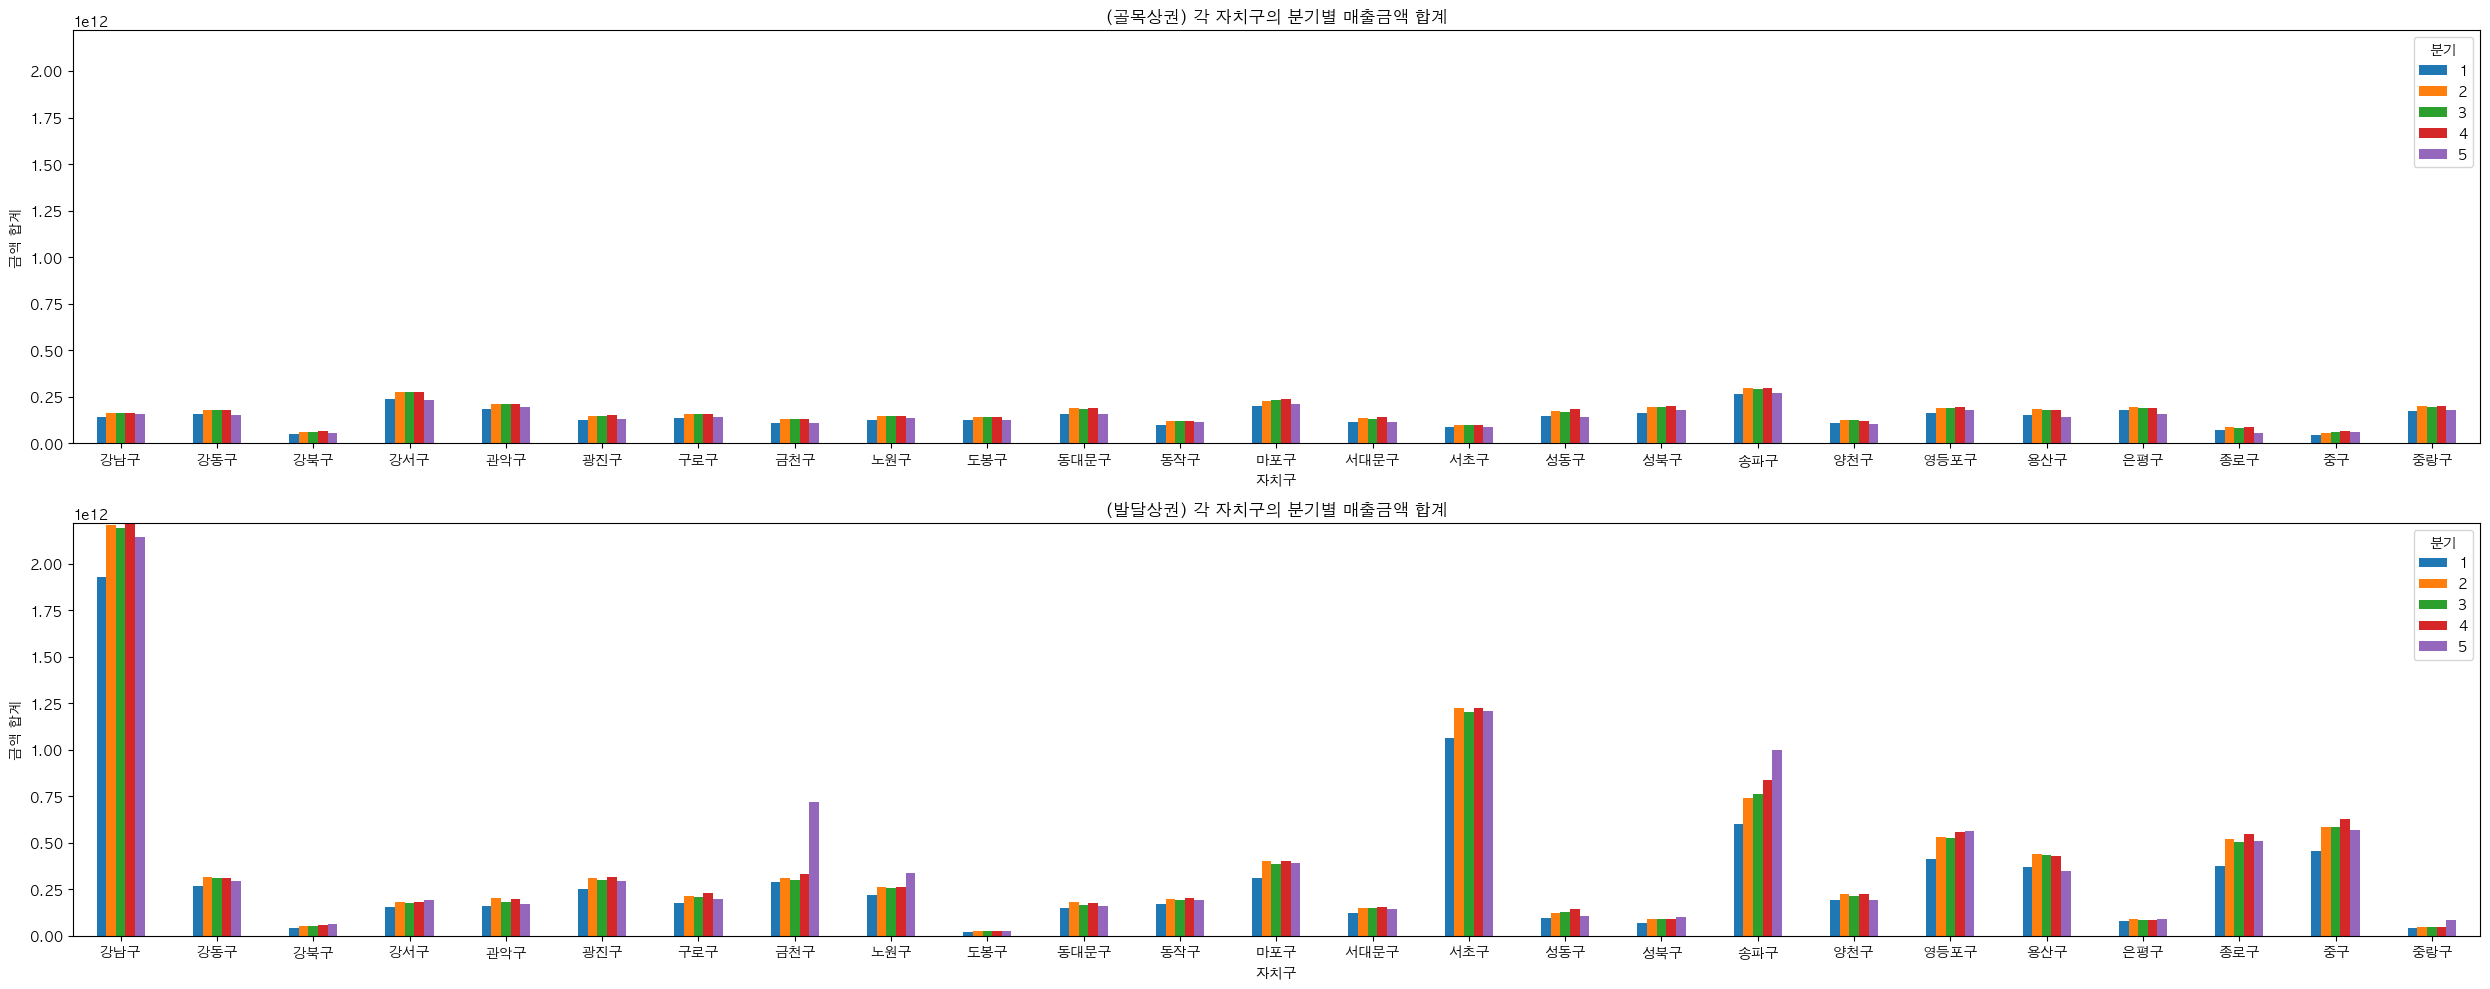

In [55]:
############################################ 위의 그래프 수치 통일해서 한눈에 비교 
# 자치구의 각 '분기'별 금액 합계
five_each_money_sum = df_g.groupby(['자치구', '분기'])['금액'].sum().unstack()          # 골목   분기별 금액 
b_five_each_money_sum = df_b.groupby(['자치구', '분기'])['금액'].sum().unstack()        # 발달   분기별 금액 

# 두 데이터프레임 중에서 최대값 찾기
max_value = max(five_each_money_sum.max().max(), b_five_each_money_sum.max().max())

# 동일한 y-축 스케일을 가진 서브플롯 생성
fig, axes = plt.subplots(2, 1, figsize=(25, 10), sharey=True)

# 첫 번째 그래프 그리기 (골목상권)
five_each_money_sum.plot(kind='bar', ax=axes[0])                                   # 골목  분기별 금액 
axes[0].set_xlabel('자치구')
axes[0].set_ylabel('금액 합계')
axes[0].set_title('(골목상권) 각 자치구의 분기별 매출금액 합계')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].legend(title='분기', labels=['1', '2', '3', '4', '5'])
axes[0].set_ylim(0, max_value)  # y-축 범위 설정

# 두 번째 그래프 그리기 (발달상권)
b_five_each_money_sum.plot(kind='bar', ax=axes[1])                                # 발달   분기별 금액 
axes[1].set_xlabel('자치구')
axes[1].set_ylabel('금액 합계')
axes[1].set_title('(발달상권) 각 자치구의 분기별 매출금액 합계')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].legend(title='분기', labels=['1', '2', '3', '4', '5'])
axes[1].set_ylim(0, max_value)  # y-축 범위 설정

plt.tight_layout()
plt.show()

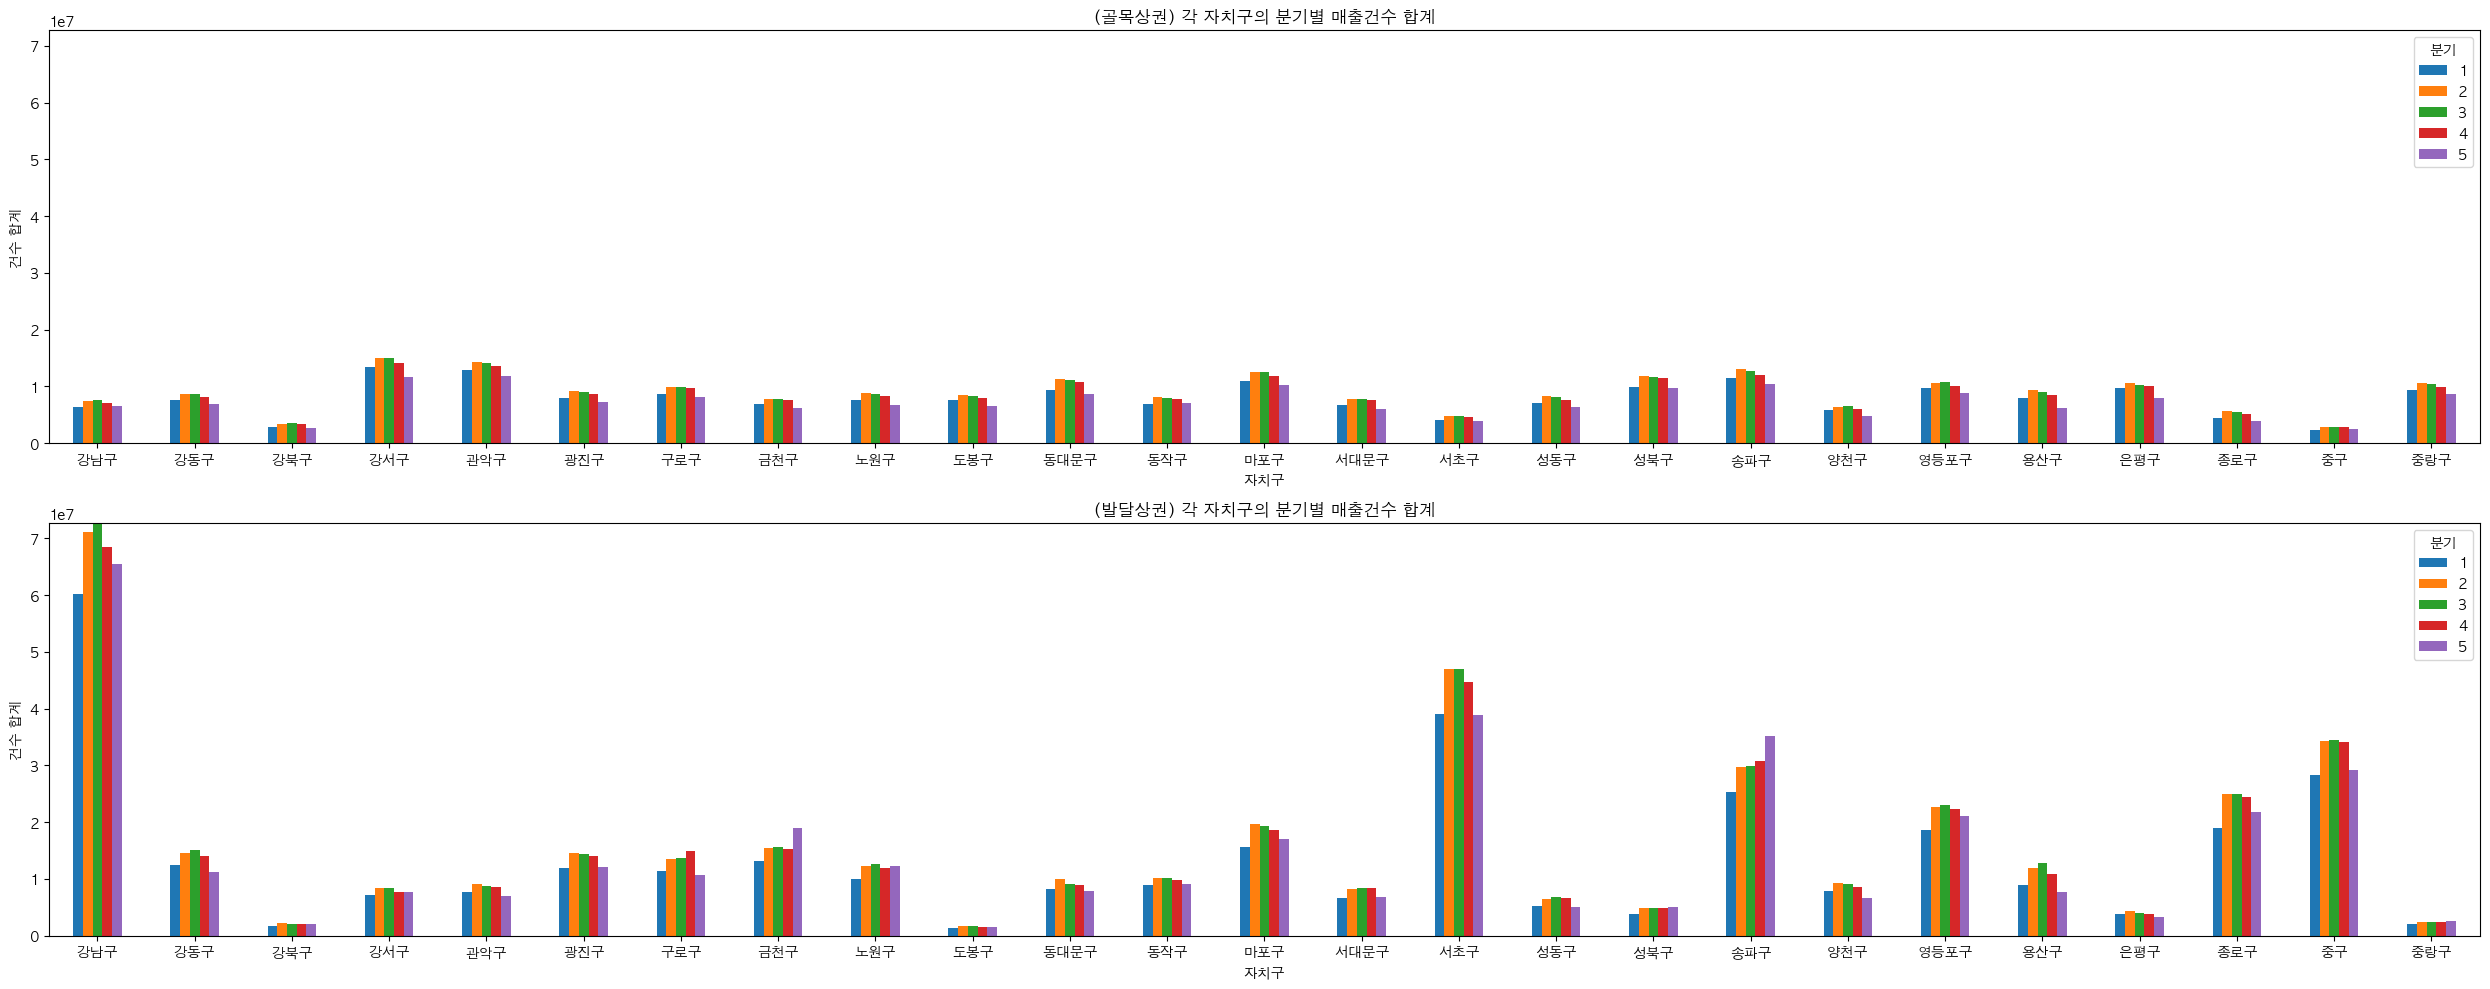

In [56]:
############################################ 위의 그래프 수치 통일해서 한눈에 비교 
# 자치구의 각 '분기'별 건수 합계
five_each_gun_sum = df_g.groupby(['자치구', '분기'])['건수'].sum().unstack()          # 골목   분기별 건수 
b_five_each_gun_sum = df_b.groupby(['자치구', '분기'])['건수'].sum().unstack()        # 발달   분기별 건수 

# 두 데이터프레임 중에서 최대값 찾기
max_value = max(five_each_gun_sum.max().max(), b_five_each_gun_sum.max().max())

# 동일한 y-축 스케일을 가진 서브플롯 생성
fig, axes = plt.subplots(2, 1, figsize=(25, 10), sharey=True)

# 첫 번째 그래프 그리기 (골목상권)
five_each_gun_sum.plot(kind='bar', ax=axes[0])                                   # 골목   분기별 건수 
axes[0].set_xlabel('자치구')
axes[0].set_ylabel('건수 합계')
axes[0].set_title('(골목상권) 각 자치구의 분기별 매출건수 합계')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].legend(title='분기', labels=['1', '2', '3', '4', '5'])
axes[0].set_ylim(0, max_value)  # y-축 범위 설정

# 두 번째 그래프 그리기 (발달상권)                                                      # 발달  분기별 건수 
b_five_each_gun_sum.plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('자치구')
axes[1].set_ylabel('건수 합계')
axes[1].set_title('(발달상권) 각 자치구의 분기별 매출건수 합계')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].legend(title='분기', labels=['1', '2', '3', '4', '5'])
axes[1].set_ylim(0, max_value)  # y-축 범위 설정

plt.tight_layout()
plt.show()

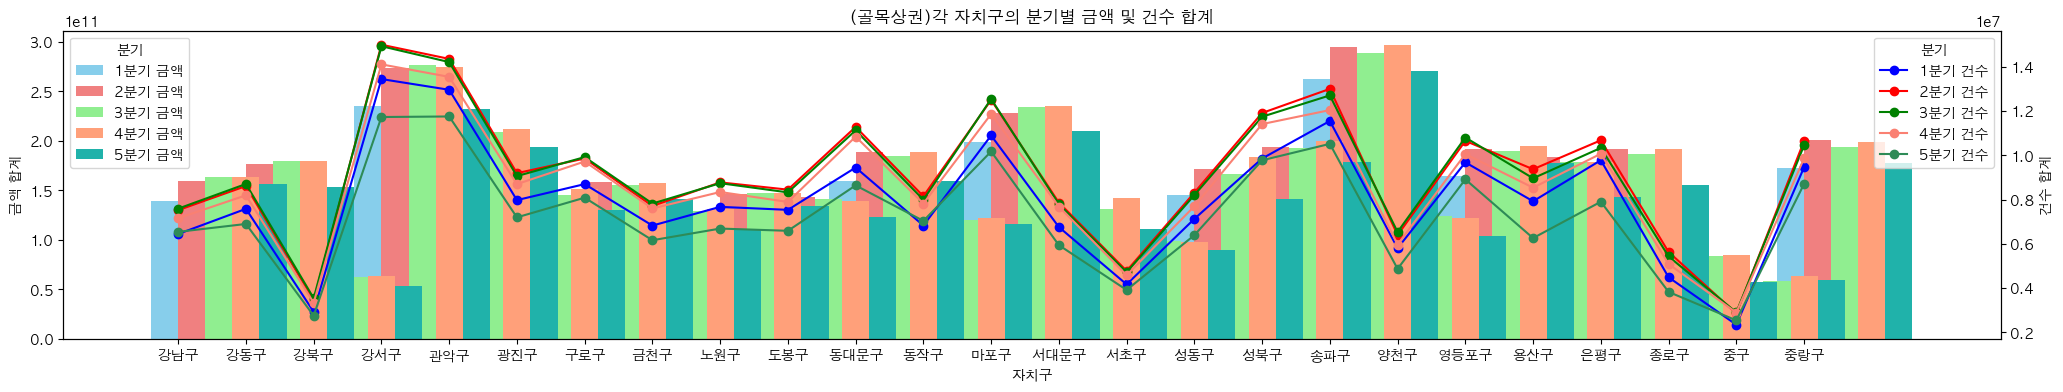

In [57]:
############################################골목상권 
# five_each_money_sum = df_g.groupby(['자치구', '분기'])['금액'].sum().unstack()    # 골목    분기별 금액  
# five_each_gun_sum = df_g.groupby(['자치구', '분기'])['건수'].sum().unstack()      # 골목    분기별 건수 
############################################ 위의 두 그래프를 한꺼번에 비교

# 바 차트 및 라인 차트 생성
fig, ax1 = plt.subplots(figsize=(25, 4))

# X축 라벨
x = range(len(five_each_money_sum))
x_labels = five_each_money_sum.index

# '금액' 합계 바 차트 그리기
width = 0.4
ax1.bar([i - width/2 for i in x], five_each_money_sum[1], width=width, label='1분기 금액', color='skyblue')
ax1.bar([i + width/2 for i in x], five_each_money_sum[2], width=width, label='2분기 금액', color='lightcoral')
ax1.bar([i + 3 * width/2 for i in x], five_each_money_sum[3], width=width, label='3분기 금액', color='lightgreen')
ax1.bar([i + 5 * width/2 for i in x], five_each_money_sum[4], width=width, label='4분기 금액', color='lightsalmon')
ax1.bar([i + 7 * width/2 for i in x], five_each_money_sum[5], width=width, label='5분기 금액', color='lightseagreen')

# '건수' 합계 라인 차트 그리기
ax2 = ax1.twinx()
ax2.plot(x, five_each_gun_sum[1], marker='o', label='1분기 건수', color='blue')
ax2.plot(x, five_each_gun_sum[2], marker='o', label='2분기 건수', color='red')
ax2.plot(x, five_each_gun_sum[3], marker='o', label='3분기 건수', color='green')
ax2.plot(x, five_each_gun_sum[4], marker='o', label='4분기 건수', color='salmon')
ax2.plot(x, five_each_gun_sum[5], marker='o', label='5분기 건수', color='seagreen')

# X축 라벨 설정
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels)
ax1.set_xlabel('자치구')
ax1.set_ylabel('금액 합계')
ax2.set_ylabel('건수 합계')

# 제목과 범례 설정
ax1.set_title('(골목상권)각 자치구의 분기별 금액 및 건수 합계')
ax1.legend(loc='upper left', title='분기')
ax2.legend(loc='upper right', title='분기')

plt.show()

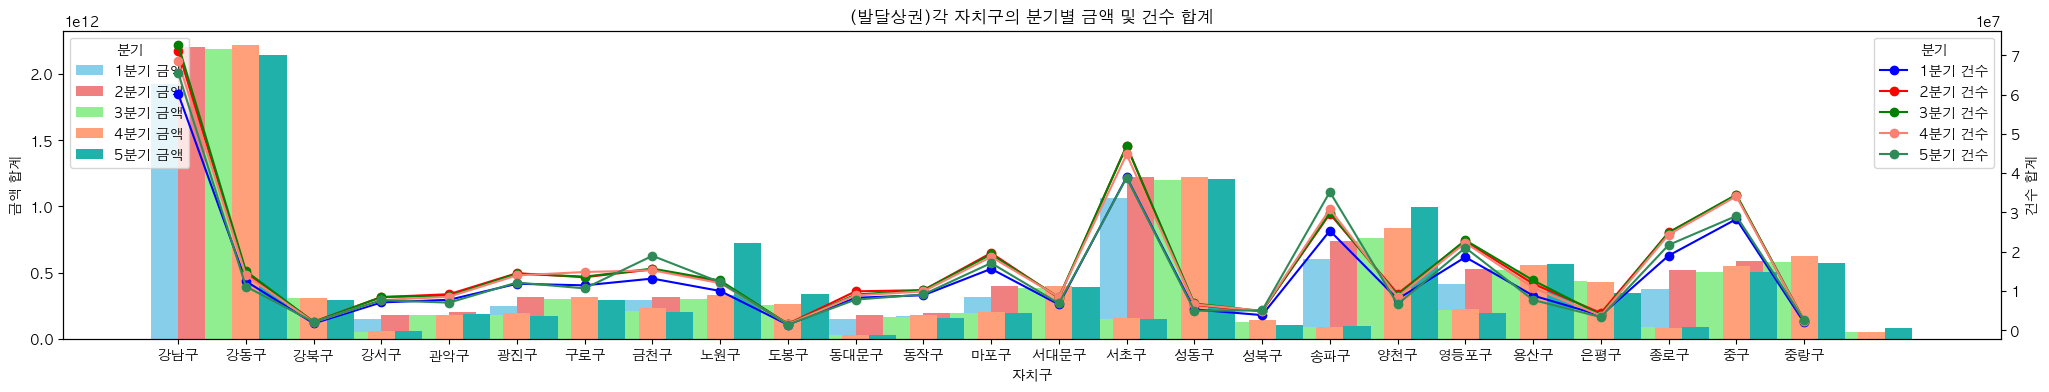

In [58]:
############################################발달상권
b_five_each_money_sum = df_b.groupby(['자치구', '분기'])['금액'].sum().unstack()   # 발달     분기별 금액 
b_five_each_gun_sum = df_b.groupby(['자치구', '분기'])['건수'].sum().unstack()     # 발달     분기별 건수 
############################################ 위의 두 그래프를 한꺼번에 비교

# 바 차트 및 라인 차트 생성
fig, ax1 = plt.subplots(figsize=(25, 4))

# X축 라벨 (어자피 금액이나 건수나 라벨 동일함) 
x = range(len(b_five_each_money_sum))
x_labels = b_five_each_money_sum.index

# '금액' 합계 바 차트 그리기
width = 0.4
ax1.bar([i - width/2 for i in x], b_five_each_money_sum[1], width=width, label='1분기 금액', color='skyblue')
ax1.bar([i + width/2 for i in x], b_five_each_money_sum[2], width=width, label='2분기 금액', color='lightcoral')
ax1.bar([i + 3 * width/2 for i in x], b_five_each_money_sum[3], width=width, label='3분기 금액', color='lightgreen')
ax1.bar([i + 5 * width/2 for i in x], b_five_each_money_sum[4], width=width, label='4분기 금액', color='lightsalmon')
ax1.bar([i + 7 * width/2 for i in x], b_five_each_money_sum[5], width=width, label='5분기 금액', color='lightseagreen')

# '건수' 합계 라인 차트 그리기
ax2 = ax1.twinx()
ax2.plot(x, b_five_each_gun_sum[1], marker='o', label='1분기 건수', color='blue')
ax2.plot(x, b_five_each_gun_sum[2], marker='o', label='2분기 건수', color='red')
ax2.plot(x, b_five_each_gun_sum[3], marker='o', label='3분기 건수', color='green')
ax2.plot(x, b_five_each_gun_sum[4], marker='o', label='4분기 건수', color='salmon')
ax2.plot(x, b_five_each_gun_sum[5], marker='o', label='5분기 건수', color='seagreen')

# X축 라벨 설정
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels)
ax1.set_xlabel('자치구')
ax1.set_ylabel('금액 합계')
ax2.set_ylabel('건수 합계')

# 제목과 범례 설정
ax1.set_title('(발달상권)각 자치구의 분기별 금액 및 건수 합계')
ax1.legend(loc='upper left', title='분기')
ax2.legend(loc='upper right', title='분기')

plt.show()

# 골목상권과 발달상권의 매출 차이에 대한 가설 

#### 1.발달상권 매출이 더 높은 경우 (강남구,서초구,종로구 등)

가설1. 직장인(빌딩숲o)과 비거주인 들이 많다. 

#### 2.골목상권 매출이 더 높은 경우 (강서구,관악구,은평구 등)

가설1. 비직장인(빌딩숲x)과 거주인 들이 많다. 

### 참고 ) 두 그래프의 수치가 달라, 헷갈릴수 있으나 ---> 발달상권 수치가 훨씬 높다. 


![발달상권의 분기별 금액 및 건수합계](https://velog.velcdn.com/images/beckhye/post/fc17f3a0-dbe1-42d0-8e99-2ff01ab96a33/image.png)
![골목상권의 분기별 금액 및 건수합계](https://velog.velcdn.com/images/beckhye/post/651a6dbd-9091-48f8-82b7-e6ca48a86790/image.png)

# 두 상권의 매출 금액 & 건수 차이

In [59]:
############################################발달상권
b_five_each_money_sum = df_b.groupby(['자치구', '분기'])['금액'].sum().unstack()   # 발달     분기별 금액 
b_five_each_gun_sum = df_b.groupby(['자치구', '분기'])['건수'].sum().unstack()     # 발달     분기별 건수 
############################################골목상권 
five_each_money_sum = df_g.groupby(['자치구', '분기'])['금액'].sum().unstack()    # 골목    분기별 금액  
five_each_gun_sum = df_g.groupby(['자치구', '분기'])['건수'].sum().unstack()      # 골목    분기별 건수 
############################################ 두 상권의 차이 비교 
mon_diff = b_five_each_money_sum - five_each_money_sum          # 분기별 금액 차이
gun_diff = b_five_each_gun_sum - five_each_gun_sum              # 분기별 건수 차이 

In [60]:
mon_diff.head()         # 두 상권의 분기별 금액 차이

분기,1,2,3,4,5
자치구,,,,,
강남구,1.788002e+12,2.046372e+12,2.028442e+12,2.054577e+12,1.986210e+12
강동구,1.117888e+11,1.369032e+11,1.301854e+11,1.313775e+11,1.397318e+11
강북구,-9.572563e+09,-8.978899e+09,-1.165334e+10,-8.002923e+09,8.940533e+09
강서구,-8.254749e+10,-9.436302e+10,-9.914654e+10,-9.226740e+10,-4.275178e+10
관악구,-2.250031e+10,-6.908532e+09,-2.655866e+10,-1.512442e+10,-2.324045e+10


In [61]:
gun_diff.head()         # 두 상권의 분기별 건수 차이

분기,1,2,3,4,5
자치구,,,,,
강남구,53753083,63629931,65130942,61385952,59019685
강동구,4905249,6046947,6361243,5831647,4253485
강북구,-1172331,-1263007,-1398793,-1280157,-647333
강서구,-6341997,-6543487,-6440821,-6419767,-4069062
관악구,-5183833,-5159297,-5446891,-4983842,-4713025


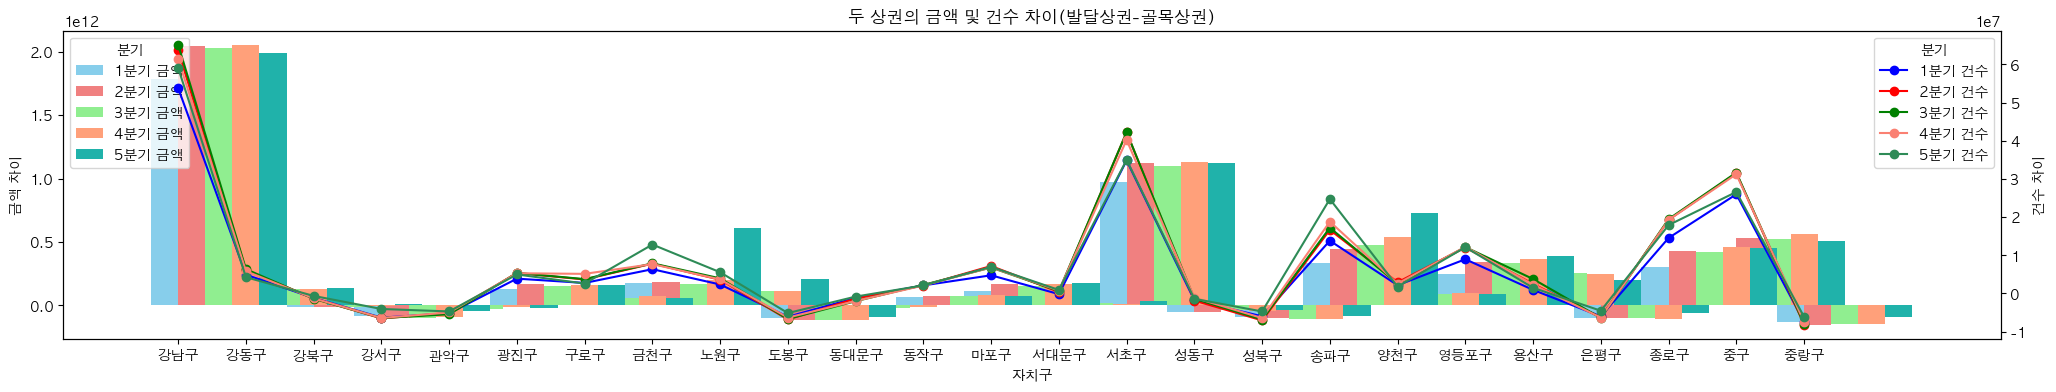

In [62]:
############################################ 두 상권의 차이 비교 
mon_diff = b_five_each_money_sum - five_each_money_sum          # 분기별 금액 차이
gun_diff = b_five_each_gun_sum - five_each_gun_sum              # 분기별 건수 차이 
############################################ 바 차트 및 라인 차트 생성
fig, ax1 = plt.subplots(figsize=(25, 4))

# X축 라벨 (어자피 금액이나 건수나 라벨 동일함) 
x = range(len(mon_diff))
x_labels = mon_diff.index

# '금액' 합계 바 차트 그리기
width = 0.4
ax1.bar([i - width/2 for i in x], mon_diff[1], width=width, label='1분기 금액', color='skyblue')
ax1.bar([i + width/2 for i in x], mon_diff[2], width=width, label='2분기 금액', color='lightcoral')
ax1.bar([i + 3 * width/2 for i in x], mon_diff[3], width=width, label='3분기 금액', color='lightgreen')
ax1.bar([i + 5 * width/2 for i in x], mon_diff[4], width=width, label='4분기 금액', color='lightsalmon')
ax1.bar([i + 7 * width/2 for i in x], mon_diff[5], width=width, label='5분기 금액', color='lightseagreen')

# '건수' 합계 라인 차트 그리기
ax2 = ax1.twinx()
ax2.plot(x, gun_diff[1], marker='o', label='1분기 건수', color='blue')
ax2.plot(x, gun_diff[2], marker='o', label='2분기 건수', color='red')
ax2.plot(x, gun_diff[3], marker='o', label='3분기 건수', color='green')
ax2.plot(x, gun_diff[4], marker='o', label='4분기 건수', color='salmon')
ax2.plot(x, gun_diff[5], marker='o', label='5분기 건수', color='seagreen')

# X축 라벨 설정
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels)
ax1.set_xlabel('자치구')
ax1.set_ylabel('금액 차이')
ax2.set_ylabel('건수 차이')

# 제목과 범례 설정
ax1.set_title('두 상권의 금액 및 건수 차이(발달상권-골목상권)')
ax1.legend(loc='upper left', title='분기')
ax2.legend(loc='upper right', title='분기')

plt.show()

### 발달상권 매출이 더 높은 곳 (붉은색)
**금액차이 bar**  : 강남구 > 서초구 > 송파구 등     red <br>
**건수차이 line** : 강남구 > 서초구 > 중구 등       pink <br><br>
가설1. 직장인들이 많다. <br><br>

### 골목상권 매출이 더 높은 곳 (푸른색)
**금액차이 bar**  : 중랑구 > 은평구 > 도봉구 등   blue<br>
**건수차이 line** : 중랑구 > 성북구 > 강서구 등   skyblue<br><br>
가설1. 거주인들이 많다. <br><br>

![상권매출 차이](https://velog.velcdn.com/images/beckhye/post/8117430e-c963-4d79-9e0b-a39a2b1de92e/image.gif)

In [ ]:
# 발달상권 저장 
df_b.to_csv('./data/df_b.csv', encoding='utf-8', index=False)

# 골목상권 저장 
df_g.to_csv('./data/df_g.csv', encoding='utf-8', index=False)